# Ayudantía 3 - Busqueda de Raices
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

# PREGUNTA 1

Complete el código

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def newton_raphson_estudiante(f, x0, tol=1e-10, max_iter=100):
    """
    Método de Newton-Raphson con preasignación de memoria usando np.empty.

    Parámetros:
    - f: función f(x)
    - x0: valor inicial
    - tol: tolerancia de convergencia
    - max_iter: número máximo de iteraciones

    Retorna:
    - newton_root: arreglo numpy con los valores de x generados durante las iteraciones
    """

    # TENGA CUIDADO CON EL np.empty.
    # SI NO SE COMPLETAN LAS ITERACIONES TIENE QUE CORTAR EL ARRAY.
    # PRINTEE LOS VALORES DE NP.EMPTY PARA VER QUE NO SE INICIAN EN 0.
    newton_root = np.empty(max_iter + 1)
    newton_root[0] = x0
    # Aca va su código
    # ----------------------------------------------------------------------------

    # ----------------------------------------------------------------------------
    return newton_root


- Si no concemos la derivada entonces tenemos que aproximarla, lo que resulta en el método de la secante? siempre?

## EJERCICIO 2
Invente una función en la cual el método de Newton entre en un loop infinito entre 3 puntos, tiene total libertad en el diseño de la función así como la elección de los puntos.

---
# Pauta

## EJERCICIO 1

In [3]:

def newton_raphson_pauta(f, x0, tol=1e-10, max_iter=100):
    """
    Método de Newton-Raphson con preasignación de memoria usando np.empty.

    Parámetros:
    - f: función f(x)
    - x0: valor inicial
    - tol: tolerancia de convergencia
    - max_iter: número máximo de iteraciones

    Retorna:
    - xs[:n]: arreglo numpy con los valores de x generados durante las iteraciones
    """
    newton_root = np.empty(max_iter + 1)
    newton_root[0] = x0
    # Aca va su código
    # ----------------------------------------------------------------------------
    h = 1e-5    
    x = x0

    for i in range(max_iter):
        fx = f(x)
        # VER PAGINA 204 DEL APUNTE
        dfx = (f(x + h) - f(x - h)) / (2 * h)

        if np.abs(dfx) < 1e-14:
            print("Derivada cercana a cero. Paren todo!!")
            return newton_root[:i+1]

        x_new = x - fx / dfx
        newton_root[i + 1] = x_new

        if np.abs(x_new - x) < tol:
            return newton_root[:i+2]

        x = x_new
    # ----------------------------------------------------------------------------
    return newton_root

---
## EJERCICIO 2

### 1. ¿Qué significa el loop?

Para que existe un loop basicamente necesitamos que se cumplan los siguientes casos:
$$
\begin{cases}
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}\\
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}\\
x_0 = x_2 - \frac{f(x_2)}{f'(x_2)}\\
\end{cases}
$$

---

### 2. Elegir puntos
yo elegí:
$$
x_0 = 0 , \quad x_1 =1 , \quad x_2 =2
$$
---

### 3. Elegir una función
- Aquí se pone complicada la cosa, muchas funciones pueden ser candidatas.
- !!por favor antes de seguir la pauta intente crear una función por su propia cuenta!!
- Yo elegí un **polinomio** por su continuidad y flexibilidad y además calcular su derivada es muy sencillo.
- En el paso 1 definimos 3 ecuaciones así que solo necesitamos 3 variables para que exista una solución, pero con un polinomio de grado 2 el loop no funciona (INTENTELO!).
- Así que la función seleccionada sera un polinomio de grado 4 con el cual vamos a obtener un sistema sobredeterminado con infinitas soluciones.

$$
f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3
$$

$$
f'(x) = a_1 + 2a_2 x + 3 a_3 x^2
$$

--- 

### 4.  Reemplazando en el sistema del paso 1
- Al remplazar tanto $f(x)$ como $f'(x)$ así como los puntos $x_0,x_1$ y $x_2$ en las 3 ecuaciones del paso 1, debería llegar al siguiente sistema:
$$
\begin{split}
a_0 + a_1 &= 0\\
a_1 + 3 a_2 + 4a_3 &=0\\
-a_1 - 4a_2 -16a_3 &=0 \\
\end{split}
$$

---

### 5. Resolver el sistema
- Se puede resolver simplemente con sustitución y debería llegar a:
$$
\begin{split}
a_0 &= -32a_3\\
a_1 &= 32a_3 \\
a_2 &= -12a_3 \\
\end{split}
$$
---

### 6. Plantear el polinomio
- Dado que el sistema es sobredeterminado tenemos infinitas soluciones para los infinitos valores de $a_3$, yo elegí $a_3 =1$ y llegamos a:
$$
P(x) = -32 + 32x -12x^2 + x^3
$$
--- 

# ATENCIÓN !!
Se le invita a probar el codigo de abajo con su propia versión de la función newton_raphson, probrando distintas funciones y puntos de inicio.

# Visualizando lo Trabajado

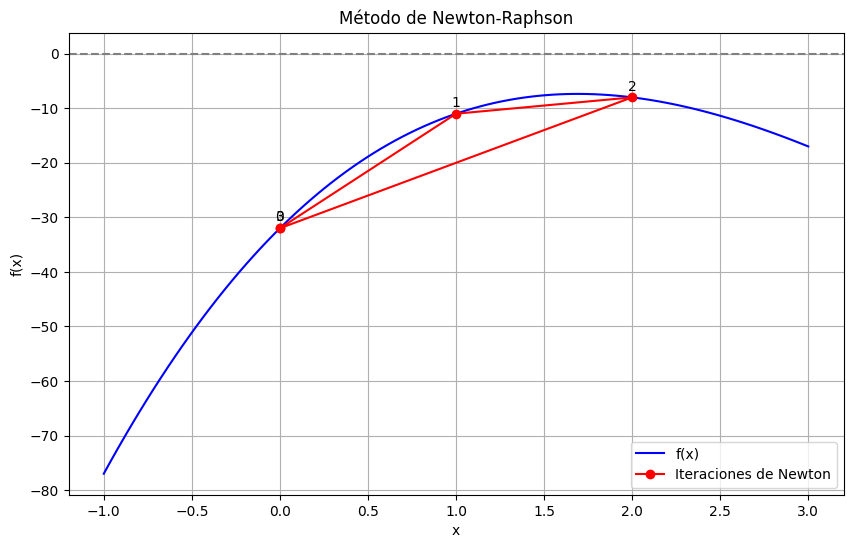

Raíz encontrada: 7.971667770334534e-11
Evaluando f en la raíz: -31.999999997449066
Historial de las raices: [0.00000000e+00 1.00000000e+00 2.00000000e+00 7.97166777e-11]


In [4]:
def f_nice(x): # USAR x0 = 10
    return x**3 - x - 2

def f_loop2(x): # USAR x0 = 0.5
    return (4*x**4) - (6*x**2) - (11/4)

def f_loop3(x): # USAR x0 = 0
    return (-32) + (32*x) + (-12*x**2) + (x**3)

f_used = f_loop3
x0 = 0
roots = np.array(newton_raphson_pauta(f_used, x0, max_iter=3))

margin = 1
x_vals = np.linspace(min(roots) - margin, max(roots) + margin, 100)
y_vals = f_used(x_vals)

# ----------------------------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.axhline(0, color='gray', linestyle='--')
y_roots = f_used(roots)
plt.plot(roots, y_roots, 'ro-', label='Iteraciones de Newton')
for i, (root, yi) in enumerate(zip(roots, y_roots)):
    plt.annotate(f"{i}", (root, yi), textcoords="offset points", xytext=(0,5), ha='center')
plt.title("Método de Newton-Raphson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
print("Raíz encontrada:", roots[-1])
print("Evaluando f en la raíz:", f_used(roots[-1]))
print("Historial de las raices:", roots)